# Time Series Analysis Exercise 2: Wholesale Price Index Forecasting

In this exercise we will practice time series analysis and forecasting on a dataset of historical USA [Wholesale Price Index](https://www.investopedia.com/terms/w/wpi.asp) values. We are interested in predicting the upcoming WPI value given the history of WPI values until a given time.

This exercise requires the `statsmodels` library, available by default in Google Colab and Anaconda and which can be installed with `pip install statsmodels`.

**Questions:**
1. Load `wholesale_price_index.csv` into a dataframe `df`. Use arguments `parse_dates=` and `index_col=` with `pd.read_csv()` so that the dates are used as the DataFrame index. Is the data evenly spaced, and if so, what time interval is used?

In [1]:
# your code here
import pandas as pd
df = pd.read_csv('wholesale_price_index.csv', parse_dates = True, index_col = ['t'])

In [2]:
df.head(10)

,wpi,ln_wpi
t,,
1960-01-01,30.7,3.424263
1960-04-01,30.8,3.427515
1960-07-01,30.7,3.424263
1960-10-01,30.7,3.424263
1961-01-01,30.8,3.427515
1961-04-01,30.5,3.417727
1961-07-01,30.5,3.417727
1961-10-01,30.6,3.421000
1962-01-01,30.7,3.424263


The data is evenly spaced and the time interval used is 3months.


2. We will only be using the `ln_wpi` column for this exercise, which contains **log-scaled** Wholesale Price Index values. Save `ln_wpi` values for years before 1984 in `wpi_train` and `ln_wpi` values for years at and after 1984 in `wpi_test`.

In [3]:
# your code here
wpi_train = df.loc[:'1983-10-01','ln_wpi']

In [4]:
wpi_test = df.loc['1984-01-01':,'ln_wpi']


3. Plot the values of `wpi_train` and `wpi_train.diff()` in separate line plots. What do these represent?


<Axes: title={'center': 'Plot of log wpi without diff'}, xlabel='t'>

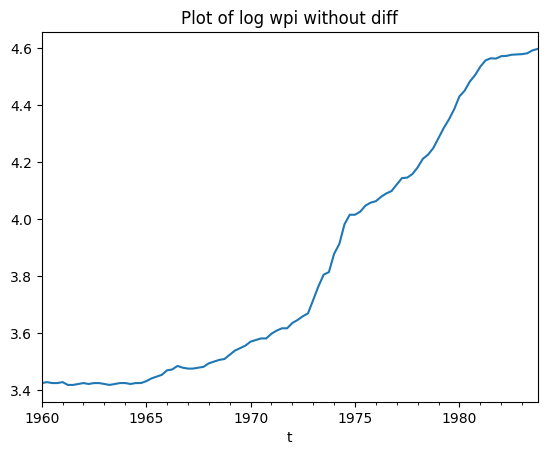

In [5]:
# your code here
wpi_train.plot(kind = 'line', title ='Plot of log wpi without diff')


This plot represents the value of wpi_train with no lag.

<Axes: title={'center': 'plot of log wpi with diff = 1'}, xlabel='t'>

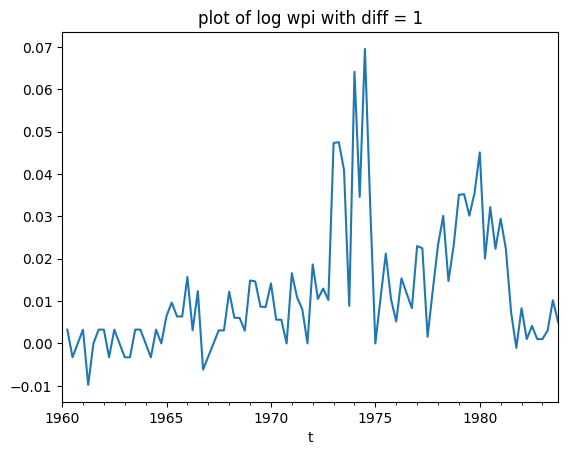

In [6]:
wpi_train.diff().plot(kind = 'line', title = 'plot of log wpi with diff = 1')

This plot represents the difference of consecutive value of wpi_train with a lag of 1.

4. Evaluate a baseline naive (random walk) model as follows:
  * For each sample $y_t$ in `wpi_test`, the baseline prediction is $\hat{y}_t = y_{t-1}$, i.e. use the previous ground truth at time $t-1$ as the prediction for time $t$.
  * Calculate the RMSE of the predictions $\hat{y}_t$ versus the ground truth values $y_t$ over the test set `wpi_test`.


In [7]:
# your code here
y_pred_naive = pd.concat([pd.Series(wpi_train[::-1].iloc[:1]),wpi_test.loc[:'1990-07-01']])
y_pred_naive.index = wpi_test.index

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(wpi_test,y_pred_naive))

0.012154870654685845

We get a rmse of 0.012

5. Plot the predictions from the last question on top of the observed values for `wpi_test`. Make sure the x axis in the plot is the time index and that $y_t$ and $\hat{y}_t$ are aligned correctly. Include the RMSE value in the title of the plot.


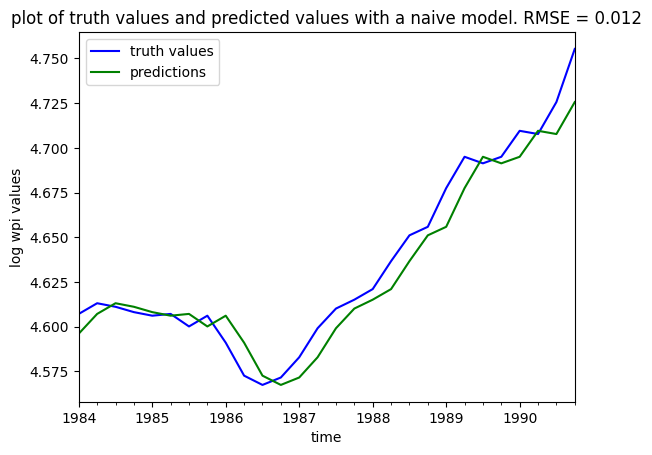

In [9]:
# your code here
import matplotlib.pyplot as plt
wpi_test.plot(kind = 'line', color = 'blue', title = 'plot of truth values and predicted values with a naive model. RMSE = 0.012', label = 'truth values')
y_pred_naive.plot(kind = 'line', color = 'green', label = 'predictions')
plt.xlabel('time')
plt.ylabel('log wpi values')
plt.legend()
plt.show()

6. We will be treat the series as integrated of order one, i.e. using an ARIMA(p,1,q) model. This assumes that the first finite difference of the series is stationary. Using your answer to 3, explain why this makes *more* sense than an ARIMA(p,0,q) model.


ARMA models are assuming that the dataset is stationary. However, we saw on plots from Q3 that the train set is not stationary. However, when we take the diff of lag 1, we get a stationary data. So taking an ARIMA(p,1,q) make more sense.

7. Using the `plot_acf` and `plot_pacf` functions from the `statsmodels` library, plot the ACF and the PACF of `wpi_train.diff()`. Make sure to drop NaN values so that the plots display correctly. Note: you may add a semicolon (;) at the end of the code to avoid double-printing the graphs.


In [10]:
# your code here
diff_one_wpi = wpi_train.diff().dropna()

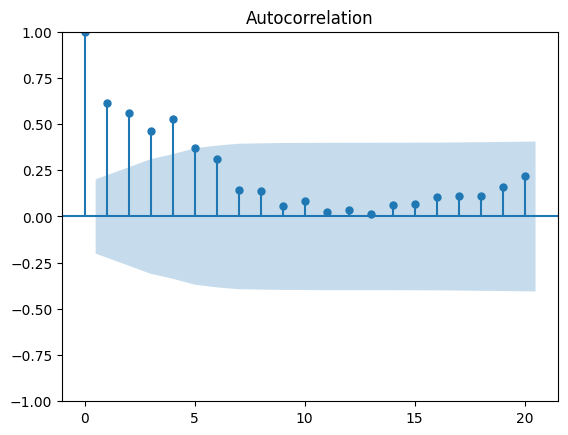

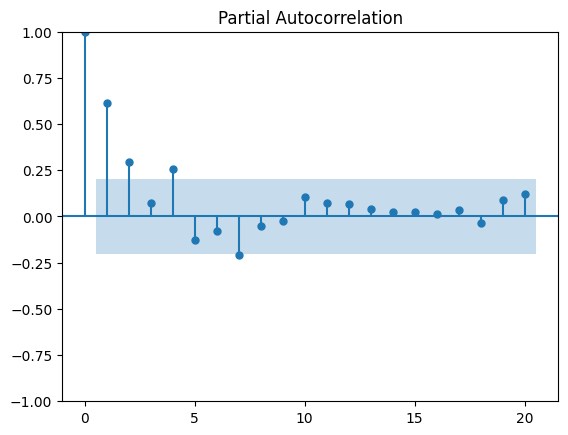

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(diff_one_wpi);
plot_pacf(diff_one_wpi);

8. We will model our data using an ARIMA(4,1,0) model. Explain the orders p=4 and q=0 of this model using what you see in the graphs from the previous question. An approximate/ballpark answer is fine.


Based on the plots above, we can see on the partial autocorrelation plots that we have a significant result until 4 previous observations so p = 4 make sense.

For q, we see on the autocorrelation plots that correlations are very high until lag of 4 so it can be a reason not to consider white noise at all (I would have chosen q = 4...)

9. Use an Arima(4,1,0) model to forecast values of `wpi_test` and compare its predictions to the observed data as follows:
  * Set `history = wpi_train.to_list()` and `predictions = []`
  * For each time step `t in range(len(wpi_test))` do the following:
    * Train an ARIMA model on `history` using `model = ARIMA(..., order=...)` from `statsmodels.tsa.arima_model` (or `arima.model` if using version >= 0.12 of statsmodels).
    * Fit the model with `model_fit = model.fit()`.
    * Predict the next WPI using  `model_fit.forecast()` and append it to `predictions`.
    *  Append the `t`-th element of `wpi_test` to `history`.


In [12]:
# your code here
from statsmodels.tsa.arima.model import ARIMA
history = wpi_train.to_list()
predictions = []
for t in range(len(wpi_test)):
  model = ARIMA(history,order = (4,1,0))
  model_fit = model.fit()
  predictions.append(model_fit.forecast()[0])
  history.append(wpi_test.iloc[t])




/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
np.sqrt(mean_squared_error(wpi_test,predictions))

0.010522052163570583

We get a rmse of 0.010 whereas we got a rmse of 0.012 for the baseline naive model.

10. For `model_fit` from the final time step, run and examine the output of `model_fit.summary()` (you do not need to explain the output).


In [14]:
# your code here
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  123
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 380.801
Date:                Sun, 18 Feb 2024   AIC                           -751.603
Time:                        20:31:13   BIC                           -737.583
Sample:                             0   HQIC                          -745.908
                                - 123                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4199      0.073      5.788      0.000       0.278       0.562
ar.L2          0.2044      0.087      2.350      0.019       0.034       0.375
ar.L3          0.0331      0.074      0.451      0.652      -0.111       0.177
ar.L4          0.2369      0.091      2.608      0.009       0.059       0.415
sigma2         0.0001   8.69e-06     12.948      0.000    9.55e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.69
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

11. Plot the predictions from the last question on top of the observed values for `wpi_test`. What is the RMSE of these predictions? Include it in the title of the plot.


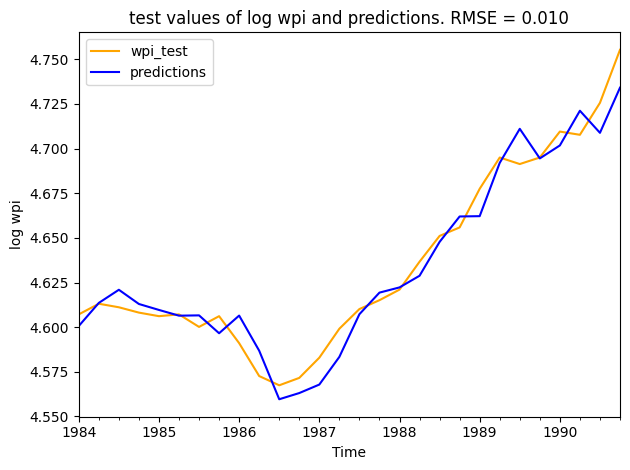

In [15]:
# your code here
wpi_test.plot(kind = 'line', color = 'orange', label = 'wpi_test', title = 'test values of log wpi and predictions. RMSE = 0.010')
pd.Series(predictions, index = wpi_test.index).plot(kind = 'line', color = 'blue', label = 'predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('log wpi')
plt.legend()
plt.tight_layout()
plt.show()

12. How do the forecasts of our ARIMA model compare to the naive baseline?


Our ARIMA model is better than our naive baseline. We get a rmse of 0.010 whereas we got a rmse of 0.012 for our naive baseline.

13. (BONUS) The method we used above of retraining the model and calculating a new forecast at each step is called "time series cross-validation" or the "rolling origin" method.* Another option is to only train the model on the training data, and use the model's forecasts to predict subsequent samples. Try training and comparing baseline and ARIMA(4, 1, 0) models on the data with this procedure. Tips:
    * The baseline naive model will just predict the last value from `wpi_train` for every sample.
    * In forecasting with the ARIMA model, you do not need to use a loop. Just use `.forecast(steps=...)`. See [the statsmodels documentation](https://www.statsmodels.org/v0.11.1/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html) for more details.

  Is the ARIMA model better than the baseline using this procedure?

*(See Hyndman, R.J., & Athanasopoulos, G. (2018) [Forecasting: principles and practice, section 3.4](https://otexts.com/fpp2/accuracy.html))

In [16]:
# your code here
model = ARIMA(wpi_train.to_list(),order = (4,1,0))
model_fit = model.fit()
y_pred_fc = model_fit.forecast(steps = len(wpi_test))

In [17]:
y_pred_base = [wpi_train[::-1][0]] * len(wpi_test)

In [18]:
rmse_arima = np.sqrt(mean_squared_error(wpi_test,y_pred_fc))

In [19]:
rmse_base = np.sqrt(mean_squared_error(wpi_test,y_pred_base))

In [20]:
rmse_arima,rmse_base

(0.03886592053475086, 0.0641920464050957)

Using this procedure, the ARIMA model is better than the baseline model.